### As & With

Using As & With to tide up the query and make it easily read.

As: To rename a column, similar to the way we import libs

With: In what is called 'common table expression'

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
from google.cloud import bigquery
import numpy as np
import pandas as pd
import os

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/xlyue/Documents/kaggle learning/Intro to SQL/sql-bq-244804-803e47cbe74e.json"

In [3]:
client = bigquery.Client()
dataset_ref = client.dataset('crypto_bitcoin', project = 'bigquery-public-data')
# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [4]:
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)
print()
print(len(tables))

blocks
inputs
outputs
transactions

4


#### How many Bitcoin transactions are made per month?

In [5]:
# Construct a reference to the "transactions" table
table_ref = dataset_ref.table('transactions')

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results = 5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,aaac8b454e079237b8509c422b8a0ebd95e3eca5944b95...,137,137,1,0,000000000000000000d6cdda66edb65e8969566ca65fe3...,484015,2017-09-07 13:43:30+00:00,2017-09-01,0,1,None,1266641901,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
1,8505c4277a8da0450cb6fd345b409a87218e09987c7e92...,193,166,1,0,000000000000000000427219aa8b931acb167f582e9b9c...,485083,2017-09-13 19:30:26+00:00,2017-09-01,0,2,None,1367011480,True,0,[],"[{'index': 0, 'script_asm': 'OP_HASH160 6dffc0..."
2,d1a2060a08e8cd54480de8a0aac761b8667c175a7de08e...,213,186,1,0,000000000000000000d5ed15beb3085719e8f1b95f2924...,485005,2017-09-13 10:25:46+00:00,2017-09-01,0,2,None,1255484937,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
3,2fba35aaba056d4028d512c0fb134ff41d2d5c504fc7a1...,213,186,1,0,0000000000000000009fd230518a5b3d50ebcd5120a844...,486934,2017-09-25 17:28:19+00:00,2017-09-01,0,2,None,1431309437,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
4,630af30aa1ade3de86df071d35b6eb28e0590cf7e0bcaa...,217,190,1,0,000000000000000000841e1fa84e8e5abdfa000936524c...,483854,2017-09-06 16:06:09+00:00,2017-09-01,0,2,None,1530785512,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."


We get the Date with a CTE

In [7]:
query_with_CTE = """ 
                          WITH time AS 
                          (
                              SELECT DATE(block_timestamp) AS trans_date
                              FROM `bigquery-public-data.crypto_bitcoin.transactions`
                          )
                          SELECT COUNT(1) AS transactions, trans_date
                          FROM time
                          GROUP BY trans_date
                          ORDER BY trans_date
                          """

Here, time is a CTE we created.

In [8]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = 10**10)
query_job = client.query(query_with_CTE, job_config = safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


In [ ]:
transactions_by_date.set_index('trans_date').plot()

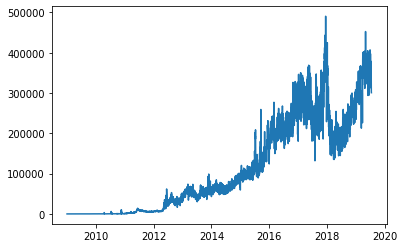

In [16]:
plt.plot(transactions_by_date.set_index('trans_date'))
plt.show()

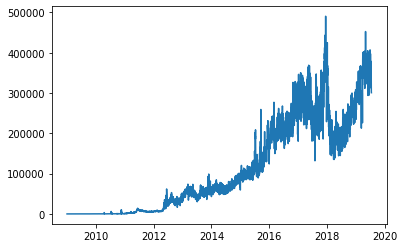

In [17]:
# or
plt.plot(transactions_by_date.trans_date, transactions_by_date.transactions)
plt.show()

CTEs let you shift a lot of your data cleaning into SQL.

Exercises

In [18]:
# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "chicago_taxi_trips" dataset
dataset_ref = client.dataset('chicago_taxi_trips', project='bigquery-public-data')

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Show the table name

In [19]:
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)
print()
print(len(tables))

taxi_trips

1


In [24]:
# Construct a reference to the "taxi_trips" table
table_ref = dataset_ref.table('taxi_trips')

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results = 5).to_dataframe()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,81d6112c1bbd0187eb51167bda64e3856e41efc9,49692f79df4c1c5856e2568d485fd41a63acc6e2b16b5c...,2018-03-06 17:00:00+00:00,2018-03-06 17:15:00+00:00,1182,4.5,None,None,14,None,...,0.0,15.75,Cash,Flash Cab,41.968069,-87.721559,POINT (-87.7215590627 41.968069),None,None,None
1,74af979c83c7681decefae3248c4be53eb83dd75,90a7cf3946c408e70e8d64b08f2bc6819ae5de6159ecef...,2018-03-06 09:00:00+00:00,2018-03-06 09:15:00+00:00,1009,4.6,None,None,14,None,...,0.0,14.75,Cash,Flash Cab,41.968069,-87.721559,POINT (-87.7215590627 41.968069),None,None,None
2,6975ab2efb215e30f55c6b43e96dea23b19ccd98,a0a5ca80f20ed5f103270c7c1d197539033a94b60c6bbd...,2018-03-12 22:00:00+00:00,2018-03-12 22:30:00+00:00,1569,20.3,None,None,14,None,...,0.0,49.75,Cash,Flash Cab,41.968069,-87.721559,POINT (-87.7215590627 41.968069),None,None,None
3,628ce3fb7694f62f32a1bf22def72e369f216317,b597697c5b962a3f36ed67d274ec82ed1b72232c537b5a...,2018-03-12 05:00:00+00:00,2018-03-12 05:15:00+00:00,840,7.9,None,None,14,None,...,0.0,21.75,Cash,Flash Cab,41.968069,-87.721559,POINT (-87.7215590627 41.968069),None,None,None
4,bf1828ce376a873a37b390a2d348a102da260bf9,d9b418798eff38cad71ed49fc9fa217dbe1aa91d4b6fd7...,2018-03-14 14:30:00+00:00,2018-03-14 15:00:00+00:00,1054,4.1,None,None,14,None,...,0.0,14.25,Credit Card,Flash Cab,41.968069,-87.721559,POINT (-87.7215590627 41.968069),None,None,None


Some rows in several columns are of value `None`.

If the data is sufficiently old, we might be careful before assuming the data is still relevant to traffic patterns today. 

Write a query that counts the number of trips in each year.  

In [33]:
rides_per_year_query = """
                                 select extract(year from trip_start_timestamp) as year, count(1) as num_trips
                                 from `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                                 group by year
                                 order by year
                                 """

In [34]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = 10**10)
rides_per_year_query_job = client.query(rides_per_year_query, job_config = safe_config)

In [35]:
# API request - run the query, and return a pandas DataFrame
rides_per_year_result = rides_per_year_query_job.to_dataframe()

In [36]:
# View results
print(rides_per_year_result)

   year  num_trips
0  2013   27217716
1  2014   37395436
2  2015   32385875
3  2016   31759339
4  2017   24988003
5  2018   20732088
6  2019    7032967


Some data from year 2017 are questionable, now check them

In [37]:
rides_per_month_query = """
                                    select extract(month from trip_start_timestamp) as month, count(1) as num_trips
                                    from `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                                    where extract(year from trip_start_timestamp) = 2017
                                    group by month
                                    order by month
                                    """
# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
rides_per_month_query_job = client.query(rides_per_month_query, job_config = safe_config)

In [38]:
# API request - run the query, and return a pandas DataFrame
rides_per_month_result = rides_per_month_query_job.to_dataframe()

# View results
print(rides_per_month_result)

    month  num_trips
0       1    1972071
1       2    1909802
2       3    2362105
3       4    2194702
4       5    2323386
5       6    2324472
6       7    2054299
7       8    2079861
8       9    1950631
9      10    2141197
10     11    1907997
11     12    1767480


Write query code using `with` CTE

In [39]:
speeds_query = """
                       with RelevantRides as
                       (
                           select extract(hour from trip_start_timestamp) as hour_of_day, 
                                  trip_miles, 
                                  trip_seconds
                           from `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                           where trip_start_timestamp > '2017-01-01' and 
                                 trip_start_timestamp < '2017-07-01' and 
                                 trip_seconds > 0 and 
                                 trip_miles > 0
                       )
                       select hour_of_day, 
                              count(1) as num_trips, 
                              3600 * sum(trip_miles) / sum(trip_seconds) as avg_mph
                       from RelevantRides
                       group by hour_of_day
                       order by hour_of_day
                       """

In [40]:
# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = 10**10)
speeds_query_job = client.query(speeds_query, job_config = safe_config)

In [41]:
# API request - run the query, and return a pandas DataFrame
speeds_result = speeds_query_job.to_dataframe()

# View results
print(speeds_result)

    hour_of_day  num_trips    avg_mph
0             0     319339  20.230524
1             1     266529  18.937621
2             2     210147  18.777070
3             3     159668  20.158048
4             4     122183  26.736014
5             5     119312  30.769172
6             6     182738  24.588313
7             7     358406  17.735967
8             8     541775  15.079892
9             9     565548  16.543882
10           10     525120  18.539614
11           11     594603  18.928379
12           12     622324  17.838745
13           13     630181  17.671089
14           14     622465  16.974239
15           15     640430  15.688418
16           16     701435  14.283888
17           17     756627  12.462955
18           18     768251  13.646810
19           19     701064  16.642882
20           20     598614  19.536777
21           21     552726  20.433874
22           22     501095  19.531374
23           23     399587  19.877046
